In [104]:
%matplotlib inline
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)


In [105]:

# Set-Up Pricing Data Access
trading_calendar = get_calendar('CME')
bundle = 'futures'
bundle_data = bundles.load(bundle)

In [106]:
bundle_data.asset_finder.futures_exchanges

Table('futures_exchanges', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-24T13;24;53.150087/assets-6.sqlite)), Column('exchange', TEXT(), table=<futures_exchanges>, primary_key=True, nullable=False), Column('timezone', TEXT(), table=<futures_exchanges>), schema=None)

In [107]:
bundle_data.asset_finder.futures_root_symbols

Table('futures_root_symbols', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-24T13;24;53.150087/assets-6.sqlite)), Column('root_symbol', TEXT(), table=<futures_root_symbols>, primary_key=True, nullable=False), Column('root_symbol_id', INTEGER(), table=<futures_root_symbols>), Column('sector', TEXT(), table=<futures_root_symbols>), Column('description', TEXT(), table=<futures_root_symbols>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_root_symbols>), schema=None)

In [108]:
data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)

In [109]:
bundle_data.asset_finder.futures_contracts

Table('futures_contracts', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-24T13;24;53.150087/assets-6.sqlite)), Column('sid', INTEGER(), table=<futures_contracts>, primary_key=True, nullable=False), Column('symbol', TEXT(), table=<futures_contracts>), Column('root_symbol', TEXT(), ForeignKey('futures_root_symbols.root_symbol'), table=<futures_contracts>), Column('asset_name', TEXT(), table=<futures_contracts>), Column('start_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('end_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('first_traded', INTEGER(), table=<futures_contracts>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_contracts>), Column('notice_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('expiration_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('auto_close_date', INTEGER(), table=<futures_contracts>, nullable=False), Column(

In [110]:
bundle_data.asset_finder.futures_root_symbols

Table('futures_root_symbols', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-24T13;24;53.150087/assets-6.sqlite)), Column('root_symbol', TEXT(), table=<futures_root_symbols>, primary_key=True, nullable=False), Column('root_symbol_id', INTEGER(), table=<futures_root_symbols>), Column('sector', TEXT(), table=<futures_root_symbols>), Column('description', TEXT(), table=<futures_root_symbols>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_root_symbols>), schema=None)

In [111]:
bundle_data.asset_finder.futures_exchanges

Table('futures_exchanges', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-24T13;24;53.150087/assets-6.sqlite)), Column('exchange', TEXT(), table=<futures_exchanges>, primary_key=True, nullable=False), Column('timezone', TEXT(), table=<futures_exchanges>), schema=None)

In [112]:
bundle_data.asset_finder.reload_symbol_maps()

In [113]:
fut = bundle_data.asset_finder.lookup_future_symbol('SPM2018')

In [114]:
bundle_data.asset_finder.futures_sids[0:10]

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [115]:
fut.to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2018-06-16 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2018-06-15 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2018-06-15 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2018-06-16 00:00:00+0000', tz='UTC'),
 'root_symbol': 'SP',
 'sid': 7,
 'start_date': Timestamp('2016-06-15 00:00:00+0000', tz='UTC'),
 'symbol': 'SPM2018',
 'tick_size': 0.0001}

In [116]:

start_dt = pd.Timestamp('2018-01-02', tz='UTC', offset='C')
end_dt = pd.Timestamp('2018-07-25', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
dat = data.get_history_window(
    assets=[fut],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='close',
    data_frequency='daily'
)


/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: offset is deprecated. Use freq instead
  
/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: offset is deprecated. Use freq instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
dat

,Future(7 [SPM2018])
2018-01-03 00:00:00+00:00,2715.9
2018-01-04 00:00:00+00:00,2726.0
2018-01-05 00:00:00+00:00,2744.3
2018-01-08 00:00:00+00:00,2751.5
2018-01-09 00:00:00+00:00,2755.3
2018-01-10 00:00:00+00:00,2748.6
2018-01-11 00:00:00+00:00,2773.7
2018-01-12 00:00:00+00:00,2790.3
2018-01-15 00:00:00+00:00,NaN
2018-01-16 00:00:00+00:00,2781.7


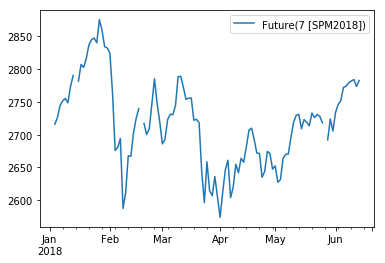

In [119]:
dat.plot()

In [120]:
cf = bundle_data.asset_finder.create_continuous_future('SP', 0, 'calendar', None)

In [40]:
oc = bundle_data.asset_finder.get_ordered_contracts('SP')

95507978035134464

In [95]:
quandl_file = '/Users/jonathan/devwork/misc_research/zipline_install/CME_20180920.csv'

In [96]:
big_df = pd.read_csv(
        quandl_file,
        names=['symbol', 'date', 'open', 'high', 'low', 'close',
               'change', 'settle', 'volume', 'prev_day_open_int'],
        parse_dates=[1]
)

In [97]:
root = big_df.symbol.str.slice(0,2)

In [98]:
big_df.head()

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int
0,0DF2015,2014-02-18,NaN,NaN,NaN,NaN,4.596,578.571,0.0,10.0
1,0DF2015,2014-02-19,NaN,NaN,NaN,NaN,0.862,577.709,0.0,10.0
2,0DF2015,2014-02-20,NaN,NaN,NaN,NaN,0.925,578.634,0.0,10.0
3,0DF2015,2014-02-21,NaN,NaN,NaN,NaN,1.768,576.866,3.0,10.0
4,0DF2015,2014-02-24,NaN,NaN,NaN,NaN,3.261,580.127,0.0,13.0


In [99]:
big_df[(root=='SP') & (big_df.date > pd.Timestamp('2016-01-01'))].to_csv('/Users/jonathan/devwork/misc_research/zipline_install/CME_small_20180920.csv', header=False, index=False)


In [100]:
big_df[(root=='SP') & (big_df.date > pd.Timestamp('2016-01-01'))].to_csv('/Users/jonathan/devwork/misc_research/zipline_install/CME_small_20180920.csv', header=False, index=False)


In [101]:
data = big_df[(root=='SP') & (big_df.date > pd.Timestamp('2016-01-01'))]

In [102]:
data.date.max()

Timestamp('2018-09-20 00:00:00')

In [103]:
data.date.min()

Timestamp('2016-01-04 00:00:00')

In [58]:
data.symbol.unique()

array(['SPM2018'], dtype=object)

In [59]:
14*260

3640

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 12931776 to 12931890
Data columns (total 10 columns):
symbol               115 non-null object
date                 115 non-null datetime64[ns]
open                 80 non-null float64
high                 112 non-null float64
low                  103 non-null float64
close                114 non-null float64
change               113 non-null float64
settle               115 non-null float64
volume               115 non-null float64
prev_day_open_int    115 non-null float64
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 9.9+ KB


In [61]:
def quandl_symbol_split(symbol):
    l = len(symbol)
    year = int(symbol[l-4:l+1])
    month_letter = symbol[l-5:l-4]
    root_symbol = symbol[:l-5]
    return root_symbol, month_letter, year

In [62]:
import numpy as np

In [63]:
data.reset_index(drop=True)

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int
0,SPM2018,2018-01-02,NaN,2698.0,NaN,2695.5,16.9,2694.90,180.0,249.0
1,SPM2018,2018-01-03,NaN,2715.9,NaN,2715.9,18.1,2713.00,1.0,122.0
2,SPM2018,2018-01-04,NaN,2730.0,NaN,2726.0,13.3,2726.30,0.0,126.0
3,SPM2018,2018-01-05,NaN,2744.3,NaN,2744.3,18.9,2745.20,15.0,121.0
4,SPM2018,2018-01-08,NaN,2751.5,2740.2,2751.5,4.1,2749.30,0.0,108.0
5,SPM2018,2018-01-09,NaN,2760.3,NaN,2755.3,5.6,2754.90,0.0,108.0
6,SPM2018,2018-01-10,NaN,NaN,2740.9,2748.6,1.6,2753.30,0.0,106.0
7,SPM2018,2018-01-11,2761.5,2773.7,2761.5,2773.7,19.0,2772.30,36.0,106.0
8,SPM2018,2018-01-12,NaN,2790.3,NaN,2790.3,19.4,2791.70,28.0,107.0
9,SPM2018,2018-01-16,NaN,2811.7,2773.7,2781.7,5.6,2786.10,95.0,99.0


In [74]:
data=data.assign(root_symbol='')
data=data.assign(exp_month_letter= '')
data=data.assign(exp_year=-1)

In [75]:
data

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int,root_symbol,exp_month_letter,exp_year
12931776,SPM2018,2018-01-02,NaN,2698.0,NaN,2695.5,16.9,2694.90,180.0,249.0,,,-1
12931777,SPM2018,2018-01-03,NaN,2715.9,NaN,2715.9,18.1,2713.00,1.0,122.0,,,-1
12931778,SPM2018,2018-01-04,NaN,2730.0,NaN,2726.0,13.3,2726.30,0.0,126.0,,,-1
12931779,SPM2018,2018-01-05,NaN,2744.3,NaN,2744.3,18.9,2745.20,15.0,121.0,,,-1
12931780,SPM2018,2018-01-08,NaN,2751.5,2740.2,2751.5,4.1,2749.30,0.0,108.0,,,-1
12931781,SPM2018,2018-01-09,NaN,2760.3,NaN,2755.3,5.6,2754.90,0.0,108.0,,,-1
12931782,SPM2018,2018-01-10,NaN,NaN,2740.9,2748.6,1.6,2753.30,0.0,106.0,,,-1
12931783,SPM2018,2018-01-11,2761.5,2773.7,2761.5,2773.7,19.0,2772.30,36.0,106.0,,,-1
12931784,SPM2018,2018-01-12,NaN,2790.3,NaN,2790.3,19.4,2791.70,28.0,107.0,,,-1
12931785,SPM2018,2018-01-16,NaN,2811.7,2773.7,2781.7,5.6,2786.10,95.0,99.0,,,-1


In [76]:
for index, row in data.iterrows():
    a, b, c = quandl_symbol_split(row.symbol)
    #print(
    #    str(index) + ": " + str(a) + ":" + str(b) + ":" + str(c)
    #)
    data.loc[index, 'root_symbol'], data.loc[index, 'exp_month_letter'], data.loc[index, 'exp_year'] = a, b, c

In [77]:
data

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int,root_symbol,exp_month_letter,exp_year
12931776,SPM2018,2018-01-02,NaN,2698.0,NaN,2695.5,16.9,2694.90,180.0,249.0,SP,M,2018
12931777,SPM2018,2018-01-03,NaN,2715.9,NaN,2715.9,18.1,2713.00,1.0,122.0,SP,M,2018
12931778,SPM2018,2018-01-04,NaN,2730.0,NaN,2726.0,13.3,2726.30,0.0,126.0,SP,M,2018
12931779,SPM2018,2018-01-05,NaN,2744.3,NaN,2744.3,18.9,2745.20,15.0,121.0,SP,M,2018
12931780,SPM2018,2018-01-08,NaN,2751.5,2740.2,2751.5,4.1,2749.30,0.0,108.0,SP,M,2018
12931781,SPM2018,2018-01-09,NaN,2760.3,NaN,2755.3,5.6,2754.90,0.0,108.0,SP,M,2018
12931782,SPM2018,2018-01-10,NaN,NaN,2740.9,2748.6,1.6,2753.30,0.0,106.0,SP,M,2018
12931783,SPM2018,2018-01-11,2761.5,2773.7,2761.5,2773.7,19.0,2772.30,36.0,106.0,SP,M,2018
12931784,SPM2018,2018-01-12,NaN,2790.3,NaN,2790.3,19.4,2791.70,28.0,107.0,SP,M,2018
12931785,SPM2018,2018-01-16,NaN,2811.7,2773.7,2781.7,5.6,2786.10,95.0,99.0,SP,M,2018
